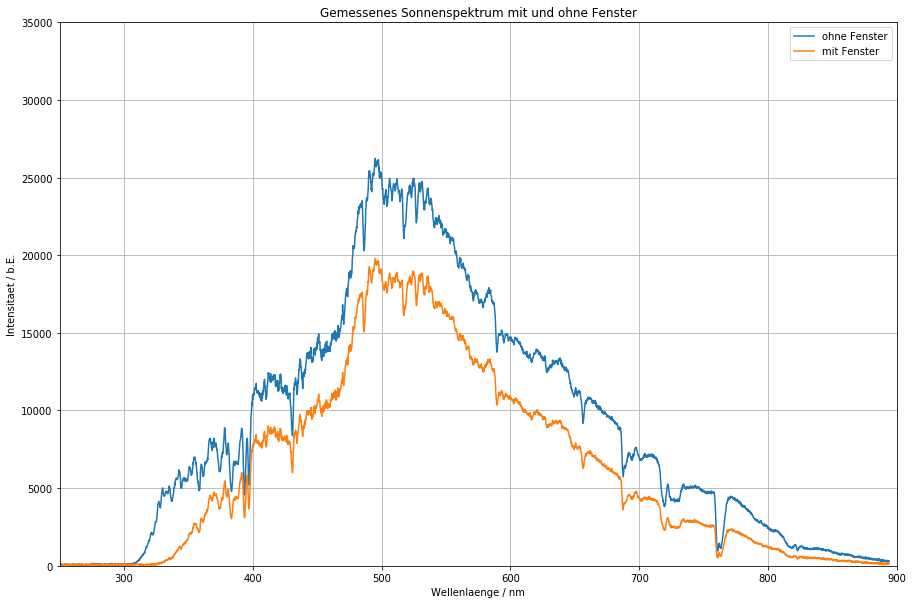

In [4]:
%matplotlib inline
# importiere Bibliotheken
import matplotlib.pyplot as plt
import numpy as np
# Kommazahlen mit , ausgeben (statt .)
def comma_to_float (valstr):
    return float (valstr.decode("utf-8").replace(',','.'))

# Importiere Daten
# Ohne Fenster 
lamb_og, inten_og = np.loadtxt(r"C:\Users\Quirinus\Documents\GitHub\Praktikum\Praktikum\234 - Lichtquellen\Lichtquellen Spektrum\ohne fenster.txt" , 
                               skiprows =17 , converters = { 0 :comma_to_float, 1 :comma_to_float}, 
                               comments = '>',unpack=True)
# Mit Fenster
lamb_mg, inten_mg = np.loadtxt(r"C:\Users\Quirinus\Documents\GitHub\Praktikum\Praktikum\234 - Lichtquellen\Lichtquellen Spektrum\durch fenster.txt" , 
                               skiprows =17 , converters = { 0 :comma_to_float, 1 :comma_to_float}, 
                               comments = '>',unpack=True)


# Plot für ohne Fenster
plt.figure(figsize=(15,10))
plt.plot(lamb_og, inten_og, label = 'ohne Fenster' )
# Plot für mit Fenster
plt.plot(lamb_mg, inten_mg, label = 'mit Fenster' )

plt.title( 'Gemessenes Sonnenspektrum mit und ohne Fenster' )
plt.xlabel( 'Wellenlaenge / nm' )
plt.ylabel( 'Intensitaet / b.E.' )
plt.legend()
plt.grid() 
# Werte- / Definitionsbereich
plt.ylim(( 0 , 35000 ))
plt.xlim(( 250 , 900))
# Speichern
plt.savefig(r"C:\Users\Quirinus\Documents\GitHub\Praktikum\Praktikum\234 - Lichtquellen\Sonnenspektrum.pdf")


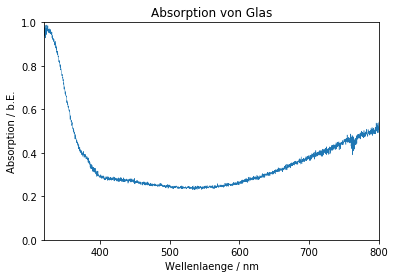

In [5]:
# Berechnung der Absorption von Glas
# Werte die gleich Null sind werden übersprungen
A =1- inten_mg[inten_og>0] / inten_og[inten_og>0]
#Hier wird der zweite Plot initialisiert
plt.plot(lamb_mg[inten_og>0], A, linewidth = 0.5) 
plt.title( 'Absorption von Glas' ) 
plt.xlabel( 'Wellenlaenge / nm' ) 
plt.ylabel( 'Absorption / b.E.' )
plt.ylim(( 0 , 1))
plt.xlim(( 320 , 800 )) 
#datei speichern
plt.savefig(r"C:\Users\Quirinus\Documents\GitHub\Praktikum\Praktikum\234 - Lichtquellen\Absorption_Glas.pdf")

<IPython.core.display.Javascript object>


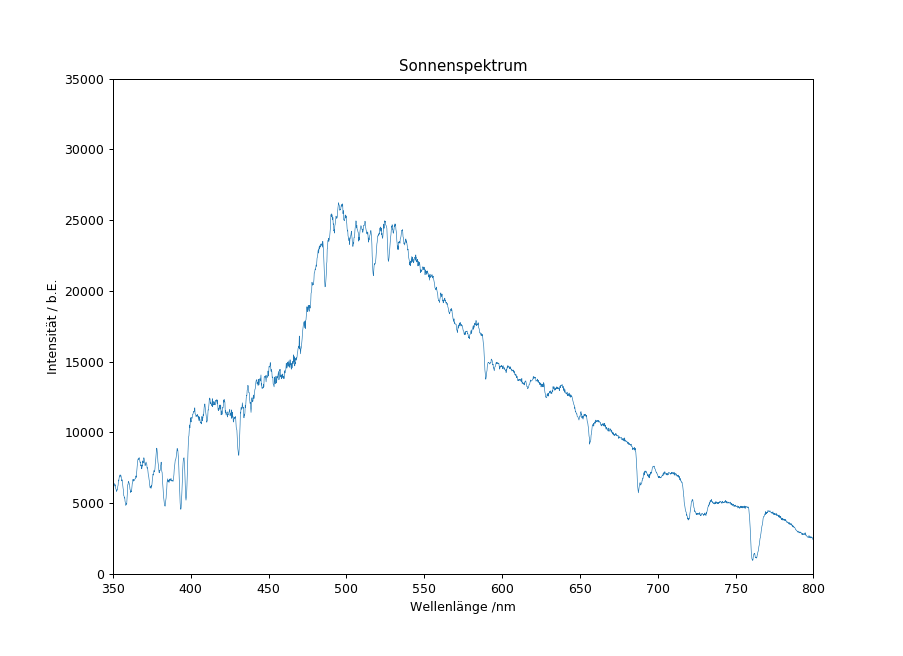

In [9]:
%matplotlib notebook 
plt.plot(lamb_og, inten_og, linewidth = 0.5)
plt.title('Sonnenspektrum')
plt.xlabel('Wellenlänge /nm')
plt.ylabel('Intensität / b.E.')
plt.ylim((0, 35000))
plt.xlim((350, 800))
plt.savefig(r"C:\Users\Quirinus\Documents\GitHub\Praktikum\Praktikum\234 - Lichtquellen\Frauenhoferlinien.pdf")

In [7]:
lamb_og, inten_og = np.loadtxt( 'C:/Users/Praktikum-Pc1/Documents/AA/rechts.txt' , skiprows =17 , converters = { 0 :comma_to_float, 1 :comma_to_float}, comments = '>' , unpack = True)                           
plt.figure(figsize=(15,10))
plt.plot(lamb_og, inten_og) 
plt.title( 'Spektrallinien mittlerer Intensitaet bei der Natriummessung' ) 
plt.xlabel( 'Wellenlaenge / nm' )
plt.ylabel( 'Intensitaet / b.E.' ) 
plt.yscale( 'log' ) 
plt.ylim(( 100 , 60000 )) 
plt.xlim(( 600 , 850 ))
#plt.savefig( "C:/Users/Praktikum-Pc1/Desktop/becher/NaSpektrumUEBER.pdf" , format = "pdf" )

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Praktikum-Pc1/Documents/AA/rechts.txt'

In [ ]:
%matplotlib notebook

lamb_og, inten_og = np.loadtxt( 'C:/Users/Praktikum-Pc1/Documents/AA/Natrium 1.txt' , skiprows =17 , converters = { 0 :comma_to_float, 1 :comma_to_float}, comments = '>' , unpack = True)                           
plt.figure(figsize=(15,10))
plt.plot(lamb_og, inten_og) 
plt.title( 'Natriumspektrum geringer Intensitaet' ) 
plt.xlabel( 'Wellenlaenge / nm' )
plt.ylabel( 'Intensitaet / b.E.' ) 
plt.yscale( 'log' ) 
plt.ylim(( 900 , 70000 )) 
plt.xlim(( 300 , 540 ))
plt.savefig( "C:/Users/Praktikum-Pc1/Documents/AA/NaSpektrumUEBER.pdf" , format = "pdf" )

In [ ]:
for m in range (3,13):
    l=1.2398E3/(-13.605/(m)**2+3)
    print('m={m:2d}, lambda={l:6.2f}'.format(m=m,l=l))

In [ ]:
for m in range (4,6):
    l=1.2398E3/(-13.605/(m-0.8)**2+5.12)
    print('m={m:2d}, lambda={l:6.2f}'.format(m=m,l=l))

In [ ]:
for m in range (4,6):
    l=1.2398E3/(-13.605/(m-0.8)**2+5.12) #hier müsst ihr noch ergänzen, die Zeit wurde knapp, die Formel ist so nicht richtig
    print('m={m:2d}, lambda={l:6.2f}'.format(m=m,l=l))

In [ ]:
wellenl=np.array([452.3,440.2,433.8,430.4,426.7])
fehler=np.array([1,1,1,1,1])
quantenz=np.arange(7,12)

plt.errorbar(quantenz,wellenl,fehler, fmt=".")
plt.xlabel('Quantenzahl')
plt.ylabel('Wellenlaenge/nm')
plt.title('1. Nebenserie des Na-Atoms')

from scipy.optimize import curve_fit
def fit_func(m,E_Ry,E_3p,D_d):
    return 1.2398E3/(E_Ry/(m-D_d)**2-E_3p)

para = [-13.6,-3,-0.02]
popt, pcov = curve_fit(fit_func, quantenz, wellenl, sigma=fehler ,p0=para)

print("E_Ry=",popt[0], ",Standardfehler=", np.sqrt(pcov[0][0]))
print("E_3p=",popt[1], ",Standardfehler=", np.sqrt(pcov[1][1]))
print("D_d=",popt[2], ",Standardfehler=", np.sqrt(pcov[2][2]))


In [ ]:
chi2_=np.sum((fit_func(quantenz,*popt)-wellenl)**2/fehler**2)
dof=len(quantenz)-3 #dof:degreesof freedom, Freheitsgrad
chi2_red=chi2_/dof
print("chi2=", chi2_)
print("chi2_red=",chi2_red)

In [ ]:
from scipy.stats import chi2
prob=round(1-chi2.cdf(chi2_,dof),2)*100
print("Wahrscheinlichkeit:", prob,"%")

In [ ]:
plt.errorbar(quantenz,wellenl,fehler, fmt=".")
plt.xlabel('Quantenzahl')
plt.ylabel('Wellenlaenge/nm')
plt.ylim((400,1000))
plt.title('1. Nebenserie des Na-Atoms')
x=np.linspace(2.8,12.2, 100)
plt.plot(x, fit_func(x,*popt))
plt.savefig("data/1_Nebenserie.pdf", format="pdf")